In [35]:
import pandas as pd
import numpy as np
import seaborn as sns

In [55]:
# Import the csv file into the notebook
df = pd.read_csv("../ShopifyInternApplication/2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv")

In [56]:
# Check to make sure the data has been imported properly
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [38]:
df['created_at'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5000 entries, 0 to 4999
Series name: created_at
Non-Null Count  Dtype 
--------------  ----- 
5000 non-null   object
dtypes: object(1)
memory usage: 39.2+ KB


In [39]:
# All of the entries in this dataset are in March of 2017
min(df['created_at']), max(df['created_at'])

('2017-03-01 0:08:09', '2017-03-30 9:55:00')

In [40]:
# This is the Naive answer since some orders had multiple items
# and one user ordered over $11mm worth of product in 30 days
df['order_amount'].mean()

3145.128

In [41]:
# Median is a better unit of measure 
df['order_amount'].median()

284.0

In [42]:
# We can see here that the largest order had 2000 items
df['total_items'].describe()

count    5000.00000
mean        8.78720
std       116.32032
min         1.00000
25%         1.00000
50%         2.00000
75%         3.00000
max      2000.00000
Name: total_items, dtype: float64

In [43]:
# There are 17 orders with 2000 items this is an outlier
df_outlier = df.loc[df['total_items'] == 2000]
df_outlier.sort_values(by= 'created_at', ascending = True)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
4646,4647,42,607,704000,2000,credit_card,2017-03-02 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00
1562,1563,42,607,704000,2000,credit_card,2017-03-19 4:00:00


In [44]:
df.loc[df['user_id'] == 607]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
1104,1105,42,607,704000,2000,credit_card,2017-03-24 4:00:00
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00
1562,1563,42,607,704000,2000,credit_card,2017-03-19 4:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00


In [45]:
users = df.groupby(['user_id'])['order_amount'].sum().sort_values(ascending= False).to_frame()
users

,order_amount
user_id,
607,11968000
878,156936
834,108342
787,85707
969,84269
...,...
750,2359
717,2337
719,2314


In [29]:
# The shopper with user_id 607 spent nearly 11.97 million dollars at shop 42 over the 30 days in this dataset.
sum(df_outlier['order_amount'])

11968000

In [34]:
users.loc[users['order_amount'] > 20000].sum()

order_amount    14441657
dtype: int64

<AxesSubplot:xlabel='user_id', ylabel='order_amount'>

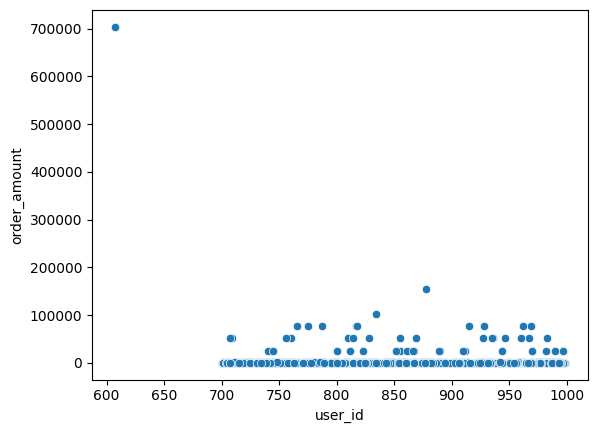

In [37]:
# visualization showing the outlier here
sns.scatterplot(x= 'user_id', y= 'order_amount', data= df)

<AxesSubplot:xlabel='order_id'>

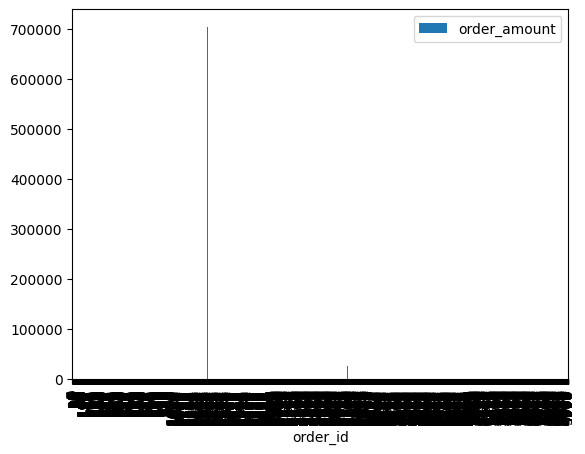

In [39]:
df.plot.bar(x='order_id', y='order_amount')

In [40]:
df['order_amount'].describe()

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

In [41]:
df.sort_values(by = 'order_amount', ascending = True)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
158,159,92,795,90,1,credit_card,2017-03-29 3:07:12
3871,3872,92,818,90,1,debit,2017-03-18 9:10:08
4760,4761,92,937,90,1,debit,2017-03-20 7:37:28
4923,4924,92,965,90,1,credit_card,2017-03-09 5:05:11
4932,4933,92,823,90,1,credit_card,2017-03-24 2:17:13
...,...,...,...,...,...,...,...
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00
1562,1563,42,607,704000,2000,credit_card,2017-03-19 4:00:00
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00


<AxesSubplot:xlabel='user_id', ylabel='order_amount'>

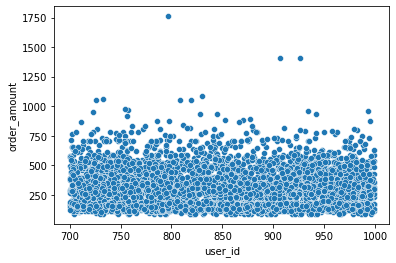

In [48]:
df_no_outlier = df.loc[df['order_amount'] < 20000]

sns.scatterplot(x= 'user_id', y= 'order_amount', data= df_no_outlier)

<AxesSubplot:xlabel='order_amount'>

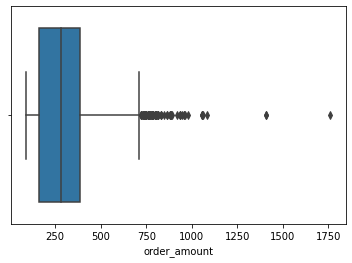

In [50]:
# This boxplot shows that even with outliers removed
# the distribution is still right skewed

sns.boxplot(x= df_no_outlier['order_amount'])

In [65]:
df_no_outlier.sort_values(by = 'order_amount', ascending = False)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
1364,1365,42,797,1760,5,cash,2017-03-10 06:28:21
1367,1368,42,926,1408,4,cash,2017-03-13 02:38:34
1471,1472,42,907,1408,4,debit,2017-03-12 23:00:22
3538,3539,43,830,1086,6,debit,2017-03-17 19:56:29
4141,4142,54,733,1064,8,debit,2017-03-07 17:05:18
...,...,...,...,...,...,...,...
590,591,92,967,90,1,debit,2017-03-28 22:56:23
4923,4924,92,965,90,1,credit_card,2017-03-09 05:05:11
4760,4761,92,937,90,1,debit,2017-03-20 07:37:28
1,2,92,925,90,1,cash,2017-03-03 17:38:52


In [69]:
df_no_outlier.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000
mean,2499.551347,49.846465,849.752279,302.580514,1.994734
std,1444.069407,29.061131,86.840313,160.804912,0.982821
min,1.000000,1.000000,700.000000,90.000000,1.000000
25%,1248.000000,24.000000,775.000000,163.000000,1.000000
50%,2497.000000,50.000000,850.000000,284.000000,2.000000
75%,3751.000000,74.000000,925.000000,387.000000,3.000000
max,5000.000000,100.000000,999.000000,1760.000000,8.000000


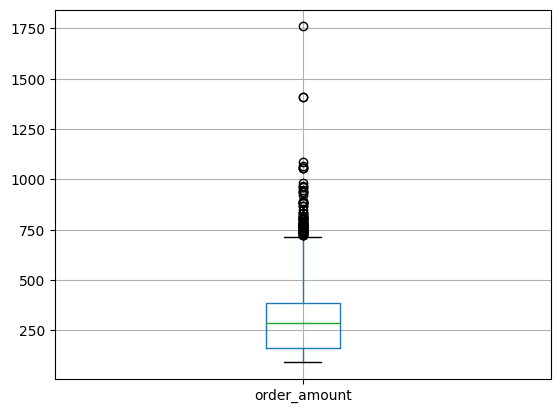

In [66]:
# This boxplot shows more order_amount outliers in the dataset
boxplot = df_no_outlier.boxplot(column = 'order_amount')

In [67]:
df_no_outlier['order_amount'].mean()

302.58051448247926

In [68]:
df_no_outlier['order_amount'].median()

284.0

<AxesSubplot:xlabel='order_id'>

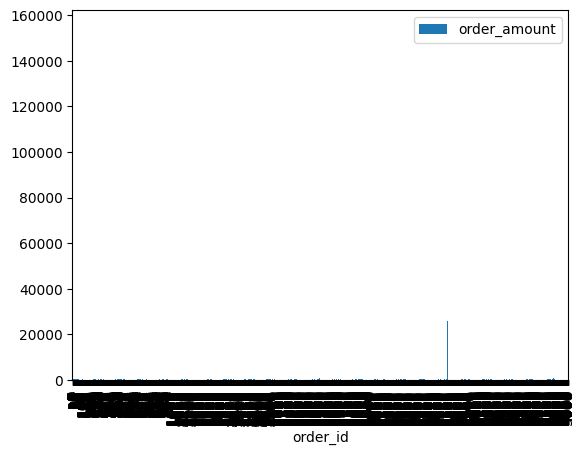

In [53]:
# Not the best visualization to use here, but does demonstrate how an 
# outlier can affect an mean calculation

df_no_outlier.plot.bar(x = 'order_id', y = 'order_amount')